# 3. Wrangling, EDA 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1 Load genotyping data file

In [3]:
genotype_data= pd.read_csv('Genotyping_data.csv', index_col=[0])
genotype_data.head()

,ID,PI86046,PI90208,PI219698,PI253651A,PI347550A,PI398807,PI408055A,PI408069,PI408169A,...,PI634759,PI423967,PI587906,PI587946,PI603516,Ref_allele,Alt_allele,Het,Missing,perc_miss
0,ss715578788,2,0,-2,0,0,0,0,0,2,...,0,0,0,0,1,14963,4858,187,79,0.003933
1,ss715578818,2,0,-2,0,0,0,0,0,2,...,0,0,0,0,1,14761,4745,345,236,0.011748
2,ss715578923,2,0,1,0,0,0,0,0,2,...,0,0,0,0,1,13915,5887,144,141,0.007019
3,ss715578960,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,18053,1825,54,155,0.007716
4,ss715579193,0,0,1,0,0,0,0,0,2,...,0,0,0,0,-2,17246,2608,174,59,0.002937


In [34]:
genotype_data.shape

(42195, 20093)

In [35]:
# First filter out those rows which does not contain any data
genotype_data = genotype_data.dropna(how = 'all')
genotype_data.shape

# so, there are no empty rows

(42195, 20093)

# 3.2 SNP filtering

NOTE: There are no SNPs having >12% missing data 

Removing any polymorphic SNP with a rate of missing and heterozygous allele calls greater than (10 %) 0.1 among the 20087 soybean and wild soybean accessions. 
The heterozygous allele calls in the remaining loci were set as missing in the subsequent analysis.

## 3.2.1 SNP filtering by number of missing values

## 3.2.1a Find how many SNPs having >10% missing data?

In [45]:
miss=genotype_data.loc[genotype_data['Missing']>2008]
miss.shape

# 12 SNPs having >10% missing but there are no SNPs beyond >2400 missing values (12%)

(12, 20093)

## 3.2.1b Filter SNPs with <10% missing

In [47]:
df1=genotype_data.loc[genotype_data['Missing']<=2008] # 2008 is 10% of 20087
df1.shape

# the 12 SNPs with >10% missing data are dropped

(42183, 20093)

42183 SNPs remained after dropping SNPs with >10% missing data

# 3.2.2 SNP filtering by number of het values

## 3.2.2a Similarly, find how many SNPs having >10% het data

In [51]:
hets=genotype_data.loc[genotype_data['Het']>2008]
hets.shape

# there are 0 SNPs with >10% het data

(0, 20093)

## 3.2.3 The heterozygous allele calls in the remaining loci were set as missing in the subsequent analysis.

### 3.2.3a First, drop the columns from df1 (contains genotyping data wiht <10% missing data)

In [9]:
geno_calls=df1.drop(['Ref_allele','Alt_allele','Het','Missing','perc_miss'], axis=1)
geno_calls.head()

,ID,PI86046,PI90208,PI219698,PI253651A,PI347550A,PI398807,PI408055A,PI408069,PI408169A,...,PI574480B,PI578360,PI578362,PI639693,PI657626,PI634759,PI423967,PI587906,PI587946,PI603516
0,ss715578788,2,0,-2,0,0,0,0,0,2,...,0,0,2,0,0,0,0,0,0,1
1,ss715578818,2,0,-2,0,0,0,0,0,2,...,0,0,2,0,0,0,0,0,0,1
2,ss715578923,2,0,1,0,0,0,0,0,2,...,0,0,2,0,0,0,0,0,0,1
3,ss715578960,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ss715579193,0,0,1,0,0,0,0,0,2,...,0,0,2,0,0,0,0,0,0,-2


### 3.2.3b Then, replace het values with -2; considering het values as missing

In [10]:
geno_calls=geno_calls.replace(1, -2)
geno_calls.head()

,ID,PI86046,PI90208,PI219698,PI253651A,PI347550A,PI398807,PI408055A,PI408069,PI408169A,...,PI574480B,PI578360,PI578362,PI639693,PI657626,PI634759,PI423967,PI587906,PI587946,PI603516
0,ss715578788,2,0,-2,0,0,0,0,0,2,...,0,0,2,0,0,0,0,0,0,-2
1,ss715578818,2,0,-2,0,0,0,0,0,2,...,0,0,2,0,0,0,0,0,0,-2
2,ss715578923,2,0,-2,0,0,0,0,0,2,...,0,0,2,0,0,0,0,0,0,-2
3,ss715578960,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ss715579193,0,0,-2,0,0,0,0,0,2,...,0,0,2,0,0,0,0,0,0,-2


In [11]:
geno_calls.shape

# 42183 rows similar to df1

(42183, 20088)

In [12]:
geno_calls.iloc[0,:].value_counts() 

# made sure only 3 allele calls exist; 0: reference allele, 2: alternate allele, -2: missing

0              14963
2               4858
-2               266
ss715578788        1
Name: 0, dtype: int64

## 3.3 Adding new columns for 0: Ref_allele, 2:Alt_allele, -2:Missing, perc_miss

### 3.3a Create new columns by Counting the frequency of a specific value in each row of dataframe?

In [13]:
geno_calls['Ref_allele'] = geno_calls.apply(lambda row: sum(row[1:20088]==0) ,axis=1)
geno_calls['Alt_allele'] = geno_calls.apply(lambda row: sum(row[1:20088]==2) ,axis=1)
geno_calls['Missing'] = geno_calls.apply(lambda row: sum(row[1:20088]==-2) ,axis=1)
# create percent missing column by dividing missing value with total samples#
geno_calls['perc_miss']=(geno_calls['Missing']/20088)*100
geno_calls.head()

,ID,PI86046,PI90208,PI219698,PI253651A,PI347550A,PI398807,PI408055A,PI408069,PI408169A,...,PI657626,PI634759,PI423967,PI587906,PI587946,PI603516,Ref_allele,Alt_allele,Missing,perc_miss
0,ss715578788,2,0,-2,0,0,0,0,0,2,...,0,0,0,0,0,-2,14963,4858,266,1.324174
1,ss715578818,2,0,-2,0,0,0,0,0,2,...,0,0,0,0,0,-2,14761,4745,581,2.892274
2,ss715578923,2,0,-2,0,0,0,0,0,2,...,0,0,0,0,0,-2,13915,5887,285,1.418757
3,ss715578960,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18053,1825,209,1.040422
4,ss715579193,0,0,-2,0,0,0,0,0,2,...,0,0,0,0,0,-2,17246,2608,233,1.159896


In [14]:
geno_calls.shape

(42183, 20092)

## 3.4 Dropping Monomorphic SNPs

In [15]:
monomorphic_SNPs=geno_calls.loc[(geno_calls['Ref_allele']==0)|(geno_calls['Alt_allele']==0)]
print('Number of monomorphic SNPs are:', len(monomorphic_SNPs))
#monomorphic_SNPs.head()

Number of monomorphic SNPs are: 37


In [25]:
# Filter all rows for which Ref_allele count is not 0
geno_calls.drop(geno_calls[geno_calls['Ref_allele'] ==0].index, inplace = True)
geno_calls.shape

# 12 rows with Ref_Allele=0 are dropped

(42171, 20092)

In [69]:
# Filter all rows for which Alt_allele count is not 0
geno_calls.drop(geno_calls[geno_calls['Alt_allele'] ==0].index, inplace = True)
geno_calls.shape

# 25 rows with Alt_Allele=0 are dropped

(42146, 20092)

42146 SNPs remained after dropping SNPs with >10% missing data, monomorphic SNPs having either 0 Reference or Alternate allele

# 3.5 Calculate minor allele frequency of ref and alt alleles

In [70]:
geno_calls['MAF_Ref']=(geno_calls['Ref_allele']*2)/((geno_calls['Ref_allele'] + geno_calls['Alt_allele'])*2)
# e.g. Population size 108, reference allele “A” = 70 and Alternate_allele “G”=38
# =(2*70)/(2*(70+38)
# =0.648 
# =1-0.648=0.352 MAF of alternate_allele
geno_calls['MAF_Alt']=1-(geno_calls['Ref_allele']*2)/((geno_calls['Ref_allele'] + geno_calls['Alt_allele'])*2)

geno_calls.head()

,ID,PI86046,PI90208,PI219698,PI253651A,PI347550A,PI398807,PI408055A,PI408069,PI408169A,...,PI423967,PI587906,PI587946,PI603516,Ref_allele,Alt_allele,Missing,perc_miss,MAF_Ref,MAF_Alt
0,ss715578788,2,0,-2,0,0,0,0,0,2,...,0,0,0,-2,14963,4858,266,1.324174,0.754906,0.245094
1,ss715578818,2,0,-2,0,0,0,0,0,2,...,0,0,0,-2,14761,4745,581,2.892274,0.756742,0.243258
2,ss715578923,2,0,-2,0,0,0,0,0,2,...,0,0,0,-2,13915,5887,285,1.418757,0.702707,0.297293
3,ss715578960,0,0,0,0,0,0,0,0,0,...,0,0,0,0,18053,1825,209,1.040422,0.908190,0.091810
4,ss715579193,0,0,-2,0,0,0,0,0,2,...,0,0,0,-2,17246,2608,233,1.159896,0.868641,0.131359


## 3.5a Drop SNPs with MAF<0.01

In [76]:
geno_MAF_Ref_1_percent=geno_calls.loc[geno_calls['MAF_Ref']>0.01]
print('SNPs with <1 % Ref_allele MAF:', geno_MAF_Ref_1_percent.shape[0])

SNPs with <1 % Ref_allele MAF: 41990


In [77]:
geno_MAF_Alt_1_percent=geno_calls.loc[geno_calls['MAF_Alt']>0.01]
print('SNPs with <1 % Alt_allele MAF:', geno_MAF_Alt_1_percent.shape[0])

SNPs with <1 % Alt_allele MAF: 39858


39858 SNPs remained after dropping SNPs with >10% missing data, monomorphic SNPS, MAF<0.01

# Drop SNPs with MAF<0.05

In [78]:
geno_MAF_Ref_5_percent=geno_calls.loc[geno_calls['MAF_Ref']>0.05]
print('SNPs with <5 % Ref_allele MAF:', geno_MAF_Ref_5_percent.shape[0])

SNPs with <5 % Ref_allele MAF: 41831


In [79]:
geno_MAF_Alt_5_percent=geno_calls.loc[geno_calls['MAF_Alt']>0.05]
print('SNPs with <5 % Alt_allele MAF:', geno_MAF_Alt_5_percent.shape[0])

SNPs with <5 % Alt_allele MAF: 36729


36729 SNPs remained after dropping SNPs with >10% missing data, monomorphic SNPS, MAF<0.05

In [80]:
geno_MAF_Alt_5_percent.head()

,ID,PI86046,PI90208,PI219698,PI253651A,PI347550A,PI398807,PI408055A,PI408069,PI408169A,...,PI423967,PI587906,PI587946,PI603516,Ref_allele,Alt_allele,Missing,perc_miss,MAF_Ref,MAF_Alt
0,ss715578788,2,0,-2,0,0,0,0,0,2,...,0,0,0,-2,14963,4858,266,1.324174,0.754906,0.245094
1,ss715578818,2,0,-2,0,0,0,0,0,2,...,0,0,0,-2,14761,4745,581,2.892274,0.756742,0.243258
2,ss715578923,2,0,-2,0,0,0,0,0,2,...,0,0,0,-2,13915,5887,285,1.418757,0.702707,0.297293
3,ss715578960,0,0,0,0,0,0,0,0,0,...,0,0,0,0,18053,1825,209,1.040422,0.908190,0.091810
4,ss715579193,0,0,-2,0,0,0,0,0,2,...,0,0,0,-2,17246,2608,233,1.159896,0.868641,0.131359


In [ ]:
geno_MAF_Alt_5_percent.to_csv('Soy50K_SNPs_filtered.csv')

## for further SNP filtering thoghts 

## slice req'ed columns

In [85]:
cols=geno_MAF_Alt_5_percent[['ID','Ref_allele','Alt_allele','Missing','perc_miss','MAF_Ref','MAF_Alt']]
cols_df=pd.DataFrame(cols)
cols_df.head()

,ID,Ref_allele,Alt_allele,Missing,perc_miss,MAF_Ref,MAF_Alt
0,ss715578788,14963,4858,266,1.324174,0.754906,0.245094
1,ss715578818,14761,4745,581,2.892274,0.756742,0.243258
2,ss715578923,13915,5887,285,1.418757,0.702707,0.297293
3,ss715578960,18053,1825,209,1.040422,0.908190,0.091810
4,ss715579193,17246,2608,233,1.159896,0.868641,0.131359


In [86]:
cols_df.shape # same number of rows after dropping SNPs with >10% missing data, monomorphic SNPS, MAF<0.05

(36729, 7)

In [87]:
cols_df['Ref_perc']=cols_df['Ref_allele']/(cols_df['Ref_allele']+cols_df['Alt_allele']) # what percentage of reference allele is there
cols_df['Alt_perc']=cols_df['Alt_allele']/(cols_df['Ref_allele']+cols_df['Alt_allele']) # what percentage of alternate allele is there
cols_df['Allele_diff']=cols_df['Ref_perc']-cols_df['Alt_perc'] # difference of ref and alternate allele percentage
cols_df.sort_values(by='Allele_diff', ascending=False) # filter data by Allele_diff


,ID,Ref_allele,Alt_allele,Missing,perc_miss,MAF_Ref,MAF_Alt,Ref_perc,Alt_perc,Allele_diff
8257,ss715592313,19007,1001,79,0.393270,0.949970,0.050030,0.949970,0.050030,0.899940
15221,ss715600397,18892,995,200,0.995619,0.949967,0.050033,0.949967,0.050033,0.899935
13174,ss715596878,19020,1002,65,0.323576,0.949955,0.050045,0.949955,0.050045,0.899910
27640,ss715617532,19011,1002,74,0.368379,0.949933,0.050067,0.949933,0.050067,0.899865
6933,ss715587775,19007,1002,78,0.388292,0.949923,0.050077,0.949923,0.050077,0.899845
...,...,...,...,...,...,...,...,...,...,...
16280,ss715602233,1,20036,50,0.248905,0.000050,0.999950,0.000050,0.999950,-0.999900
30139,ss715621158,1,20037,49,0.243927,0.000050,0.999950,0.000050,0.999950,-0.999900
34631,ss715627619,1,20038,48,0.238949,0.000050,0.999950,0.000050,0.999950,-0.999900
8789,ss715590793,1,20039,47,0.233971,0.000050,0.999950,0.000050,0.999950,-0.999900


Notice that several uneven proportion of Ref and alternate alleles, indicates uneven polymorphism. So, it's important to set threshold Ref:Alternate allele ratio.

# plot Allele_diff column to see distribution of alleles

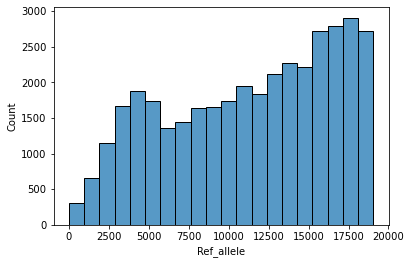

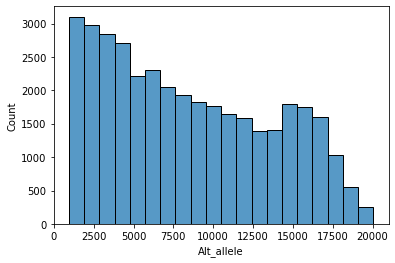

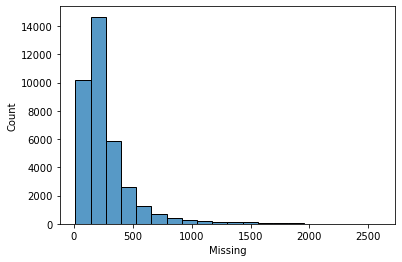

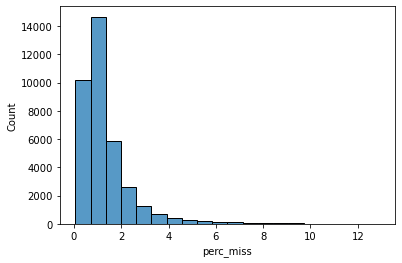

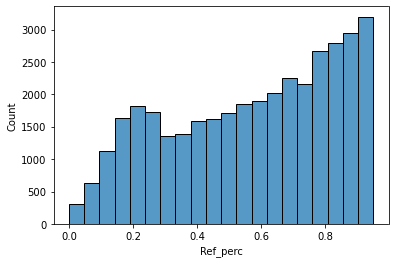

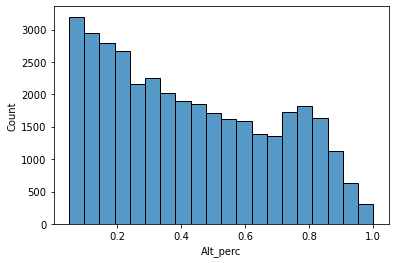

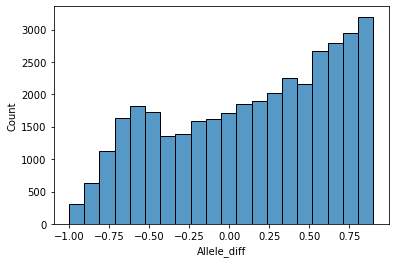

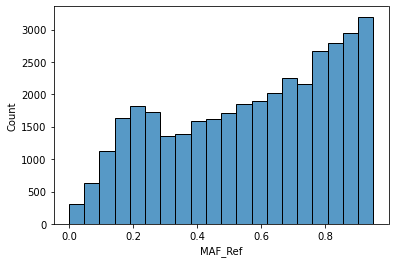

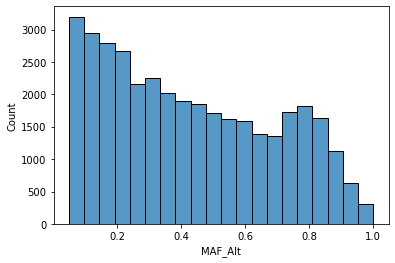

In [88]:
#fig, ax =plt.subplots(1,2)
cols=['Ref_allele','Alt_allele','Missing','perc_miss','Ref_perc','Alt_perc','Allele_diff','MAF_Ref','MAF_Alt']

for i in cols:
    sns.histplot(cols_df[i],bins=20)
    plt.show()

Summary:

SNPs filtering: 
There are 12 SNPs having >10% missing. But no SNPs having >10% het calls. Later het calls for the remaining loci were changed as missing data.
Then, dropped 37 monomophic SNPs (either Ref_allele or Alt_allele count 0). Followed by, dropped SNPs having MAF<0.05.
Finally, 36729 SNPs remained after dropping SNPs with >10% missing data, monomorphic SNPS, MAF<0.05


In [ ]:
#Population structure was estimated using a Bayesian Markov Chain Monte Carlo model (MCMC)
#Principal coordinates analysis (PCoA) based on genetic distance
#The neighbor-joining phylogenetic tree based on genetic distance matrix 